# Carga y limpieza de los datos

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("titanic.csv", sep=',')
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


* PassengerId: Identificador único para cada pasajero.
* Survived: Indicador de si el pasajero sobrevivió (1) o no (0).
* Pclass: Clase de pasajero (1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase).
* Name: Nombre del pasajero.
* Sex: Género del pasajero (Male = Masculino, Female = Femenino).
* Age: Edad del pasajero. Puede haber valores faltantes (NaN).
* SibSp: Número de hermanos/cónyuges a bordo del Titanic.
* Parch: Número de padres/hijos a bordo del Titanic.
* Ticket: Número de ticket.
* Fare: Tarifa del pasaje.
* Cabin: Número de cabina. Puede haber valores faltantes (NaN).
* Embarked: Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [4]:
data.duplicated().any()

False

In [5]:
data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [6]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1  # Rango intercuartílico

# Calcular los límites para los outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Encontrar outliers
outliers = (data < limite_inferior) | (data > limite_superior)
print(outliers.sum())

Age                         13
Fare                       116
Name                         0
Parents/Children Aboard    213
Pclass                       0
Sex                          0
Siblings/Spouses Aboard     46
Survived                     0
dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15368\3439049593.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < limite_inferior) | (data > limite_superior)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

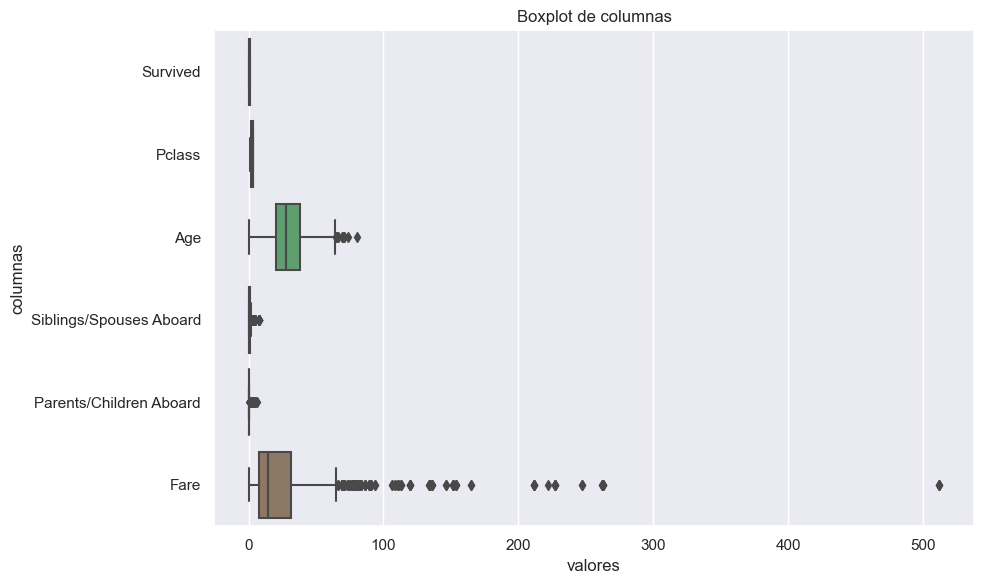

In [8]:
sns.set(style = "darkgrid")
plt.figure(figsize=(10,6))
sns.boxplot(data = data, orient="h")
plt.title("Boxplot de columnas")
plt.xlabel("valores")
plt.ylabel("columnas")
plt.tight_layout()
plt.show()